<a href="https://colab.research.google.com/github/yuki2023-kenkyu/Numerical_Computation_Seminar/blob/main/%E5%BE%AE%E5%88%86%E6%96%B9%E7%A8%8B%E5%BC%8F%E3%81%AE%E6%95%B0%E5%80%A4%E8%A7%A3%E6%B3%95_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 微分方程式の数値解法③
___

　今回は，Pythonに含まれる「SymPy」や「SciPy」というパッケージを用いて常微分方程式を解析的，あるいは数値的に解く．

## SymPyとは
___

　Pythonに代数計算の機能を提供するパッケージ．代数的に微分積分の計算や方程式を解くといった様々なことができるようになる．また，求めた数式表現に数値を代入して数値解を求められる．手計算で求めた数式のチェックにも使われる．計算結果は$\LaTeX$形式で出力されるため便利．ただし，数値計算には向かないらしい．

引用：[かくあき(2020)，『現場で使える Python科学技術計算入門』，翔泳社](https://www.amazon.co.jp/%E7%8F%BE%E5%A0%B4%E3%81%A7%E4%BD%BF%E3%81%88%E3%82%8B%EF%BC%81Python%E7%A7%91%E5%AD%A6%E6%8A%80%E8%A1%93%E8%A8%88%E7%AE%97%E5%85%A5%E9%96%80-NumPy-SymPy-SciPy-pandas%E3%81%AB%E3%82%88%E3%82%8B%E6%95%B0%E5%80%A4%E8%A8%88%E7%AE%97%E3%83%BB%E3%83%87%E3%83%BC%E3%82%BF%E5%87%A6%E7%90%86%E6%89%8B%E6%B3%95-ebook/dp/B0863FKD84)



>例題4

　微分方程式

$$
\frac{dy}{dx}=-2 \frac{1+y}{1+x}
$$

を，初期条件「$x_0=0でy_0=7$」のもとで解く．

>解答

In [ ]:
!pip install sympy

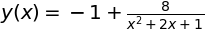

In [ ]:
# ライブラリの読み込み
import sympy as sp
# 結果をレンダリング表示
sp.init_printing()
#sp.init_printing(False, str_printer=lambda x: sy.latex(x))
# 使用する変数を宣言
sp.var('x, y')
# yをxの関数として定義
y = sp.Function('y')(x)
# 解くべき微分方程式を定義
eq1 = sp.Eq(sp.diff(y, x, 1), -2*(1+y)/(1+x))
# 微分方程式を解析的に解く
sp.dsolve(eq1, ics = {y.subs(x, 0):7})

参考URL：

・[SymPyによる数式処理](https://home.hirosaki-u.ac.jp/jupyter/sympy/) 2021/11/10 閲覧．


・[Python（SymPy）で微分方程式を解く](https://pianofisica.hatenablog.com/entry/2020/05/15/133000) 2021/11/10 閲覧．

## SciPyとは
___

　NumPyを基盤として構築されており，様々な分野に関する数値計算関数を提供するパッケージ．

　SciPyの関数の多くはFortranという数値計算用プログラミング言語で作られたライブラリをPythonから使えるようにしたもの．


　NumPyよりも計算速度や精度も高いので，SciPyを使うことがおすすめ．

 引用：[かくあき(2020)，『現場で使える Python科学技術計算入門』，翔泳社](https://www.amazon.co.jp/%E7%8F%BE%E5%A0%B4%E3%81%A7%E4%BD%BF%E3%81%88%E3%82%8B%EF%BC%81Python%E7%A7%91%E5%AD%A6%E6%8A%80%E8%A1%93%E8%A8%88%E7%AE%97%E5%85%A5%E9%96%80-NumPy-SymPy-SciPy-pandas%E3%81%AB%E3%82%88%E3%82%8B%E6%95%B0%E5%80%A4%E8%A8%88%E7%AE%97%E3%83%BB%E3%83%87%E3%83%BC%E3%82%BF%E5%87%A6%E7%90%86%E6%89%8B%E6%B3%95-ebook/dp/B0863FKD84)

> 例題５

Lorenz 方程式
$$
\left\{
    \begin{eqnarray}
       \frac{dx}{dt} &=& -px+py\\
       \frac{dy}{dt} &=& -xz+rx-y\\
       \frac{dz}{dt} &=& xy-bz\\
    \end{eqnarray}
\right.
$$


を，初期条件
$p=10,r=28,b=8/3,t_0=0,t_{max}=20,x_0=1,y_0=1,z_0=1$ のもとで解く．



> 解答

Text(0.5, 0, 'z(t)')

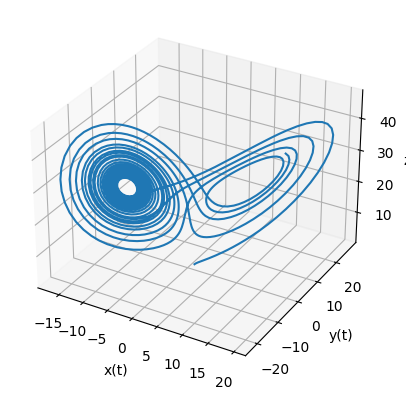

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

# 微分方程式は連立の場合，returnの際に結果をすべてリストで渡す必要がある
def lorenz(t, u, p, b, r):
    x = u[0]
    y = u[1]
    z = u[2]
    dxdt = -p * x + p * y
    dydt = -x * z + r * x - y
    dzdt = x * y - b * z
    return([dxdt, dydt, dzdt])

# parameters
p =10
b = 8.0 / 3.0
r = 28
# initial values
u0 = [1, 1, 1]
# setting
t0 = 0.0
tmax = 20.0
times = [t0, tmax]
# numerical solution using scipy.integrate
orbit = solve_ivp(lorenz, times, u0, method = 'Radau', t_eval=None, rtol=0.00001, atol=1e-8, args=(p, b, r))

#plot3D using matplotlib
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
#x,y,zの値を取得
ax.plot(orbit.y[0], orbit.y[1], orbit.y[2])
ax.set_xlabel('x(t)')
ax.set_ylabel('y(t)')
ax.set_zlabel('z(t)')

In [ ]:
orbit

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  5.068e-03 ...  2.000e+01  2.000e+01]
        y: [[ 1.000e+00  1.003e+00 ...  1.402e+01  1.402e+01]
            [ 1.000e+00  1.132e+00 ...  1.341e+01  1.338e+01]
            [ 1.000e+00  9.919e-01 ...  3.500e+01  3.503e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 8756
     njev: 135
      nlu: 620

In [ ]:
#odeintの引数の詳細を表示（ヘルプ）
??solve_ivp

参考URL：

・[『SciPyで微分方程式を解く』（水谷正大，明治大学）](https://www.isc.meiji.ac.jp/~mizutani/python/scipy_odeint.html) 2021/11/10 閲覧．

・[Pythonのスライスについて現役エンジニアが解説【初心者向け】](https://techacademy.jp/magazine/34177) 2021/11/10 閲覧．

・[scipy.integrate.solve_ivpの使い方まとめ](http://www.physics.okayama-u.ac.jp/~otsuki/lecture/CompPhys2/ode/ode.html) 2022/9/25 閲覧．

## 演習問題③
___

次の問題について，例題５のように`solve_ivp`を用いてそれぞれ数値計算せよ．

$$
 \begin{eqnarray}
  &(1)& \quad &\frac{dx}{dt} = a\cos{at},
  \quad &\frac{dy}{dt} = b\cos{bt}. \quad &
  &(a=4,b=5,t_0=0,x_0=0,y_0=0,t_{max}=2\pi)\\
  &(2)& \quad &\frac{dx}{d\theta} = -2\ (\sin{2\theta}+\sin\theta),
  \quad &\frac{dy}{d\theta} = 2\ (\cos{2\theta}+\cos\theta). \quad  &
  &(\theta_0=0,x_0=4,y_0=0,\theta_{max}=2\pi)\\
  &(3)& \quad &\frac{dx}{dt} = -y-z,
  &\frac{dy}{dt} = x+ay,
  &\frac{dz}{dt} = b+z(x-c). \quad
  &(a=0.398,b=2,c=4,t_0=0,x_0=0.01,y_0=0.01,z_0=0.01,t_{max}=150)\\
  &(4)& \quad &\frac{d^2y}{dx^2}+4\ \frac{dy}{dx}+3y=0.\quad
  &(\left.\frac{dy}{dx}\right|_{x=x_0}=1,y_0=0,x_0=0,x_{max}=10)\\
  &(5)& \quad &\frac{d^2y}{dx^2} + y = \cos x .\quad
  &(\left.\frac{dy}{dx}\right|_{x=x_0}=0,y_0=0,x_0=0,x_{max}=8\pi)\\
 \end{eqnarray}
$$